UFRGS - Universidade Federal do Rio Grande do Sul   
PPGEC - Programa de Pós-Graduação em Engenharia Civil   
PEC00025 - Introdução à Teoria de Vibrações

00312165 – DÉBORA DALA MARIA VIZIOLI 

## Trabalho 2 - Frequências Naturais e Formas Modais

 
 


In [2]:
#IMPORTANDO OS MÓDULOS
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import scipy.linalg as sc

A estrutura do presente trabalho é um sistema com 13 nós livres, com distância de 2m entre eles, verticalmente. Na horizontal, tem-se dois nós distantes 1m um do outro. A mesma foi construída no software de análise matricial "Ftool" e suas propriedades estão indicadas na Figura abaixo. 
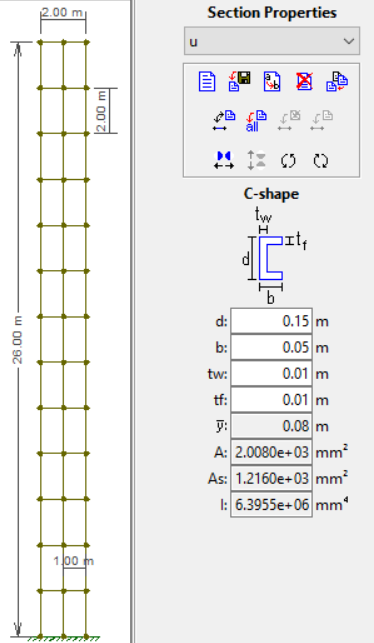



### 1. Matriz de Rigidez <a name="section_4"></a> 


Por se tratar de um sistema com 13 nós livres, a matriz de rigidez da estrutura em questão será quadrada com dimensão 13x13. A matriz de rigidez é inversa da matriz de flexibilidade, sendo assim, para a moldagem da última, denominada H, fez a obtenção dos deslocamentos em cada nó livre quando uma carga unitária positiva fosse aplicada separadamente, ou seja, quando cada nó recebesse a força. 

In [5]:
#MATRIZ DE FLEXIBILIDADE (m/N)
flexibilidade1 = np.array([[10.98, 9.890, 8.778, 7.683, 6.617, 5.589, 4.610, 3.689, 2.836, 2.060, 1.371, 0.7786, 0.29662],
[9.890, 9.159, 8.191, 7.199, 6.225, 5.280, 4.373, 3.515, 2.715, 1.982, 1.327, 0.7592, 0.2916],
[8.778, 8.191, 7.570, 6.714, 5.831, 4.970, 4.136, 3.339,  2.594, 1.905, 1.284, 0.7399, 0.2867],
[7.683, 7.199, 6.714, 6.195, 5.440, 4.661, 3.899, 3.167, 2.473, 1.827, 1.240, 0.7205, 0.2819],
[6.617, 6.225, 5.833, 5.440, 5.013, 4.348, 3.662, 2.993, 2.351, 1.750, 1.196, 0.7006, 0.2770],
[5.589, 5.280, 4.970, 4.661, 4.349, 4.004, 3.423, 2.818, 2.231, 1.673, 1.153, 0.6818, 0.2722],
[4.610, 4.373, 4.136, 3.899, 3.662, 3.423, 3.151, 2.643, 2.110, 1.595, 1.109, 0.6625, 0.2674],
[3.689, 3.515, 3.3341, 3.167, 2.993, 2.818, 2.643, 2.433, 1.987, 1.517, 1.066, 0.6432, 0.2625],
[2.836, 2.715, 2.594, 2.473, 2.352, 2.231, 2.110, 1.987, 1.831, 1.439, 1.022, 0.6238, 0.2577],
[2.060, 1.982, 1.905, 1.827, 1.750, 1.673, 1.595, 1.518, 1.439, 1.326, 0.9769, 0.6043, 0.2529],
[1.371, 1.327, 1.284, 1.240, 1.196, 1.153, 1.109, 1.066, 1.022, 0.9769, 0.8980, 0.5832, 0.2479],
[0.7786, 0.7592, 0.7398, 0.7205, 0.7012, 0.6818, 0.6625, 0.6432, 0.6238, 0.6043, 0.5832, 0.5287, 0.2415],
[0.2964, 0.2916, 0.2867, 0.2819, 0.2770, 0.2722, 0.2674, 0.2625, 0.2577, 0.2529, 0.2479, 0.2415, 0.2049]])*1e-6


In [6]:
#MATRIZ DE RIGIDEZ (N/m)
K1 = np.linalg.inv(flexibilidade1)

### 2. Matriz de Massa Concentrada <a name="section_4"></a> 

A matriz de massa concentrada representa uma matriz diagonal onde seus termos dependem da área de inflûencia dos nós. As outras posições são devido a rotação e são anulados pois não causam alteração no sitema. 
Levando em conta que a massa distruída da estrutura é de 1500kg/m e o fato de que cada nó está distante do outro 2m, tem-se que o comprimento linear é 2m, resultando assim em 3000kg por nó.

In [7]:
#MATRIZ DE MASSA CONCENTRADA (kg)
massaconcentrada1 = np.array([[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]])*1e3

### 3. Frequência Natural e Modo de Vibração <a name="section_4"></a> 

As frequências naturais e os modos de vibração são casos de autovalores e autovetores. Com eles é possível conhecer a frequência mais baixa dos sistemas, nesse caso,  

In [8]:
#OBTENÇÃO DOS AUTOVALORES E AUTOVETORES
w21, Phi1 = sc.eig(K1, massaconcentrada1)

#ORDEM DOS AUTOVALORES
iw = w21.argsort()
w21 = w21[iw]
Phi1 = Phi1[:,iw]

#FREQUÊNCIAS NATURAIS
wk1 = np.sqrt(np.real(w21))
fk1 = wk1/2/np.pi


Frequências naturais mais baixas: 
 f1= 0.42369977213739557 Hz
 f2= 1.4857855660877621 Hz
 f3= 2.8995295869023083 Hz



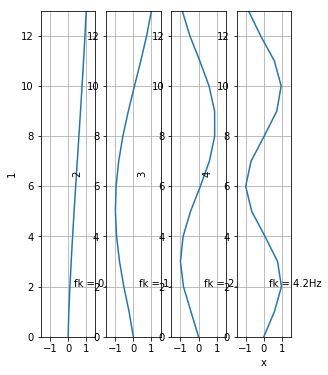

In [9]:
#PRIMEIRO MODO DE VIBRAÇÃO + MENORES FREQUÊNCIAS NATURAIS
plt.figure(1, figsize=(15,6))
x = np.arange(14)

for k in range(4):
    pk = np.zeros(14)
    pk[1:] = Phi1[::-1,k]
    pk /= np.max(np.abs(pk))   
    
    plt.subplot(1, 13, k+1)
    plt.plot(pk, x)
    
    plt.xlim(-1.5, 1.5);  plt.ylabel(str(k+1));
    plt.ylim( 0.0, 13.0);
    plt.text(0.3, 2.0, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)
    
plt.xlabel('x')

print("Frequências naturais mais baixas: \n", "f1=", fk1[0], "Hz\n","f2=", fk1[1], "Hz\n","f3=", fk1[2], "Hz\n");


### 4. Resultado do sistema a uma velocidade inicial <a name="section_4"></a> 

Quando deseja-se conhecer a resposta da estrutura a uma velocidade inicial estipula-se um impulso para o sistema. Nesse caso, buscou-se introduzir uma carga de 150kN com a mínima duração possível, dessa maneira tem-se td = Tn/4, sendo esse o menor período referente as frequências naturais. 

In [11]:
#Menor frequência natural = primeiro modo
freqmax = np.max(fk1)
print("Frequência máxima: %f" %freqmax) 
#Força atuando (N)
carga = 15000

Tn = 1/freqmax
td = Tn/4
#massa ao longo do comprimento linear de cada nó
massa = 3000
#Impulso = m*Vo = F*td
Vo = carga*td/massa
print("Velocidade inicial: %f" %Vo)

#VELOCIDADE INICIAL NO NÓ QUE APRESENTA MAIOR DESLOCAMENTO
Vo_v = [Vo, 0,0,0,0,0,0,0,0,0,0,0,0]
uo_v = np.zeros(12)

Frequência máxima: 13.725245
Velocidade inicial: 0.091073


Tendo conhecimento das equações abaixo, pode-se calcular os ângulos de fase e até mesmo as amplitudes para os nós. Levando em conta que o deslocamento inical é zero, o ângulo será 270°. 

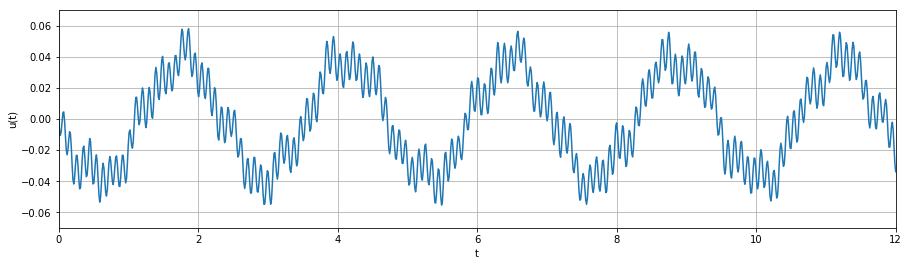

In [25]:
#AUTOVALORES TRANPOSTOS
Phit=Phi1
for k in range(12):
    Phit=Phi1.transpose()

angulo = np.pi/2
DESLMAX = np.zeros(13)

for k in range (13):
    massaconcentradai = np.dot(np.dot(Phit[k], massaconcentrada1), Phi1[k])
    deslmax = (np.dot(np.dot(Phit[k], massaconcentrada1), Vo_v))/(wk1[k]*np.sin(angulo)*massaconcentradai)
    DESLMAX[k]= deslmax

#VETOR REPRESENTATIVO DO TEMPO
t = np.linspace (0,12,1000)
#matriz 13x1000 para receber os valores dos deslocamentos
uk = np.zeros ((13,1000))

for k in range(13):
    uk[k,:]=DESLMAX[k]*np.cos(-wk1[k]*t - np.pi/2)

#Produto dos autovalores pela matriz de deslocamentos
u = np.dot(Phi1,uk)

#PLOTANDO NÓ 1 = SITUAÇÃO COM PIOR DESLOCAMENTO
plt.figure(2, figsize=(15,4))
plt.plot(t,u[1,:])
plt.xlim(0.0, 12.0); plt.xlabel("t");
plt.ylim(-0.07,0.07); plt.ylabel ("u(t)")
plt.grid (True)

### 5. Introdução do amortecimento <a name="section_4"></a> 

Para adicionar o amortecimento, faz-se uso do método de Rayleigh pois o mesmo é uma combinação das matrizes de massa e rigidez.

In [97]:
zeta=np.zeros(13)
zeta[0]=0.01
zeta[1]=0.01
alfa1= 2*(zeta[0]*wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0= 2*zeta[0]*wk1[0]-alfa1*wk1[1]**2

for k in range (11):
    zeta[k+2]=(alfa0/(2*wk1[k+2]))+(alfa1*wk1[k+2]/2)
print (zeta)

[0.01       0.01       0.01265894 0.02031446 0.02777419 0.03495541
 0.04178905 0.04850075 0.05483524 0.06038521 0.06638446 0.06957984
 0.07134567]
